<a href="https://colab.research.google.com/github/poku0857643/test/blob/main/Predict_T1DM_CGM_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Read the txt file
data = pd.read_csv('/content/drive/MyDrive/CGMdataset/IOBP2DeviceCGM.txt', delimiter='|')  # use the appropriate delimiter for your file

# Write the data to a CSV file
data.to_csv('/content/drive/MyDrive/CGMdataset/CGM.csv', index=False)
data

,RecID,PtID,DeviceDtTm,InternalDtTm,RecordType,Value,Units,SortOrd
0,23583,413,10/21/2019 12:03:16 AM,NaN,CGM,138.0,mg/dL,12.0
1,23584,413,10/21/2019 12:08:16 AM,NaN,CGM,136.0,mg/dL,13.0
2,23585,413,10/21/2019 12:13:16 AM,NaN,CGM,138.0,mg/dL,14.0
3,23586,413,10/21/2019 12:18:17 AM,NaN,CGM,139.0,mg/dL,15.0
4,23587,413,10/21/2019 12:23:17 AM,NaN,CGM,138.0,mg/dL,16.0
...,...,...,...,...,...,...,...,...
14333373,16875236,511,9/3/2020 11:39:18 PM,NaN,CGM,152.0,mg/dL,864.0
14333374,16875237,511,9/3/2020 11:44:19 PM,NaN,CGM,151.0,mg/dL,865.0
14333375,16875238,511,9/3/2020 11:49:19 PM,NaN,CGM,150.0,mg/dL,866.0
14333376,16875239,511,9/3/2020 11:54:19 PM,NaN,CGM,149.0,mg/dL,867.0


In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv('/content/drive/MyDrive/CGMdataset/CGM.csv')

# Extract the glucose values
glucose_values = data['Value'].values

# Define the blood glucose risk function
α = 1.084
β = 5.381
γ = 1.509
BGriskFunc = lambda x: γ * ((np.log(x))**α - β)

# Calculate the blood glucose risk values
BGrisk_values = BGriskFunc(glucose_values)

# Remove NaN values from the blood glucose risk values
BGrisk_values_no_nan = BGrisk_values[~np.isnan(BGrisk_values)]

# Normalize the BGrisk_values_no_nan to the range of -sqrt(10) to sqrt(10)
normalized_BGrisk_values_no_nan = np.interp(BGrisk_values_no_nan, (BGrisk_values_no_nan.min(), BGrisk_values_no_nan.max()), (-np.sqrt(10), np.sqrt(10)))

# Apply the Yeo-Johnson transformation
yj_BGrisk_values_no_nan, _ = stats.yeojohnson(BGrisk_values_no_nan)

# Add the normalized and Yeo-Johnson transformed values to the dataframe
data['Normalized BGrisk'] = np.nan
data['Normalized BGrisk'].loc[~np.isnan(BGrisk_values)] = normalized_BGrisk_values_no_nan
data['YJ Transformed BGrisk'] = np.nan
data['YJ Transformed BGrisk'].loc[~np.isnan(BGrisk_values)] = yj_BGrisk_values_no_nan

# Save the dataframe to a new CSV file
data.to_csv('/content/drive/MyDrive/CGMdataset/CGM_BGrisk.csv', index=False)

<ipython-input-1-ee34b9d14162>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Normalized BGrisk'].loc[~np.isnan(BGrisk_values)] = normalized_BGrisk_values_no_nan
<ipython-input-1-ee34b9d14162>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['YJ Transformed BGrisk'].loc[~np.isnan(BGrisk_values)] = yj_BGrisk_values_no_nan


In [ ]:
data

,RecID,PtID,DeviceDtTm,InternalDtTm,RecordType,Value,Units,SortOrd,Normalized BGrisk,YJ Transformed BGrisk
0,23583,413,10/21/2019 12:03:16 AM,NaN,CGM,138.0,mg/dL,12.0,0.381878,0.384806
1,23584,413,10/21/2019 12:08:16 AM,NaN,CGM,136.0,mg/dL,13.0,0.354577,0.357020
2,23585,413,10/21/2019 12:13:16 AM,NaN,CGM,138.0,mg/dL,14.0,0.381878,0.384806
3,23586,413,10/21/2019 12:18:17 AM,NaN,CGM,139.0,mg/dL,15.0,0.395383,0.398562
4,23587,413,10/21/2019 12:23:17 AM,NaN,CGM,138.0,mg/dL,16.0,0.381878,0.384806
...,...,...,...,...,...,...,...,...,...,...
14333373,16875236,511,9/3/2020 11:39:18 PM,NaN,CGM,152.0,mg/dL,864.0,0.562746,0.569643
14333374,16875237,511,9/3/2020 11:44:19 PM,NaN,CGM,151.0,mg/dL,865.0,0.550381,0.556967
14333375,16875238,511,9/3/2020 11:49:19 PM,NaN,CGM,150.0,mg/dL,866.0,0.537936,0.544214
14333376,16875239,511,9/3/2020 11:54:19 PM,NaN,CGM,149.0,mg/dL,867.0,0.525408,0.531383


In [ ]:
from sklearn.model_selection import train_test_split

# Convert the 'DeviceDtTm' column to datetime
data['DeviceDtTm'] = pd.to_datetime(data['DeviceDtTm'])

# Sort the data by 'PtID' and 'DeviceDtTm'
data.sort_values(by=['PtID', 'DeviceDtTm'], inplace=True)

# Get a list of unique patient IDs
unique_ids = data['PtID'].unique()

# Split the unique patient IDs into training and testing sets
train_ids, test_ids = train_test_split(unique_ids, test_size=0.2, random_state=42)

# Create the training and testing dataframes
train_data = data[data['PtID'].isin(train_ids)]
test_data = data[data['PtID'].isin(test_ids)]

# Display the number of unique patients in each set
len(train_ids), len(test_ids)


(108, 28)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Number of steps
n_steps_in = 5

#Decide patientID
patient_id = 445

# Define a function to create sequences
def create_sequences(data, n_steps_in, n_steps_out=1):
    X, y = [], []
    for i in range(len(data) - n_steps_in - n_steps_out + 1):
        X.append(data[i:i+n_steps_in, :-1]) # all columns but the last are features
        y.append(data[i+n_steps_in:i+n_steps_in+n_steps_out, -1]) # the last column is the target
    return np.array(X), np.array(y)

# Filter the training data for this patient
train_patient_data = train_data[train_data['PtID'] == patient_id][['Normalized BGrisk', 'Value']]

# Normalize features to a range of 0-1
scaler = MinMaxScaler()
train_patient_data_normalized = scaler.fit_transform(train_patient_data)

# Create sequences
X_train, y_train = create_sequences(train_patient_data_normalized, n_steps_in)

# Filter the testing data for this patient
test_patient_data = test_data[test_data['PtID'] == patient_id][['Normalized BGrisk', 'Value']]

# Normalize features to a range of 0-1 using the scaler fitted on the training data
#test_patient_data_normalized = scaler.transform(test_patient_data)

print('Number of records in training data:', len(train_data[train_data['PtID'] == patient_id]))
print('Number of records in test data:', len(test_data[test_data['PtID'] == patient_id]))




Number of records in training data: 3581
Number of records in test data: 0


In [ ]:

# Create sequences
X_test, y_test = create_sequences(test_patient_data_normalized, n_steps_in)

# Define LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps_in, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Fit model
model.fit(X_train, y_train, epochs=200, verbose=0)

# Make predictions
predictions = model.predict(X_test)

# Reverse normalization of the predictions
predictions = scaler.inverse_transform(predictions)

# Calculate RMSE
rmse_value = np.sqrt(mean_squared_error(y_test, predictions))

print('RMSE: ', rmse_value)

In [ ]:
train_data = pd.DataFrame()
test_data = pd.DataFrame()

for patient_id in data['PtID'].unique():
    patient_data = data[data['PtID'] == patient_id]
    train_size = int(len(patient_data) * 0.8)  # 80% for training
    train_patient_data = patient_data[:train_size]
    test_patient_data = patient_data[train_size:]
    train_data = pd.concat([train_data, train_patient_data])
    test_data = pd.concat([test_data, test_patient_data])


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np

# Number of steps
n_steps_in = 5

# Define a function to create sequences
def create_sequences(data, n_steps_in, n_steps_out=1):
    X, y = [], []
    for i in range(len(data) - n_steps_in - n_steps_out + 1):
        X.append(data[i:i+n_steps_in, :-1]) # all columns but the last are features
        y.append(data[i+n_steps_in:i+n_steps_in+n_steps_out, -1]) # the last column is the target
    return np.array(X), np.array(y)

# Filter the training data for this patient
train_patient_data = train_data[train_data['PtID'] == patient_id][['Normalized BGrisk', 'Value']]


# Create a separate scaler for the target variable 'Value'
target_scaler = MinMaxScaler()
train_patient_data['Value'] = target_scaler.fit_transform(train_patient_data[['Value']])

# Normalize features to a range of 0-1
scaler = MinMaxScaler()
train_patient_data_normalized = scaler.fit_transform(train_patient_data)

# Create sequences
X_train, y_train = create_sequences(train_patient_data_normalized, n_steps_in)

# Filter the testing data for this patient
test_patient_data = test_data[test_data['PtID'] == patient_id][['Normalized BGrisk', 'Value']]

# Normalize features to a range of 0-1 using the scaler fitted on the training data
test_patient_data_normalized = scaler.transform(test_patient_data)

# Create sequences
X_test, y_test = create_sequences(test_patient_data_normalized, n_steps_in)

# Define LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps_in, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Fit model
model.fit(X_train, y_train, epochs=200, verbose=0)

# Make predictions
predictions = model.predict(X_test)

# Reverse normalization of the predictions
#predictions = scaler.inverse_transform(predictions)


# ...

# Fit the LSTM model and make predictions
# ...

# Use the separate scaler to inverse transform the predictions
predictions = target_scaler.inverse_transform(predictions)


# Calculate RMSE
rmse_value = np.sqrt(mean_squared_error(y_test, predictions))

print('RMSE: ', rmse_value)



48/48 [==============================] - 0s 2ms/step
RMSE:  6.7387126351703195


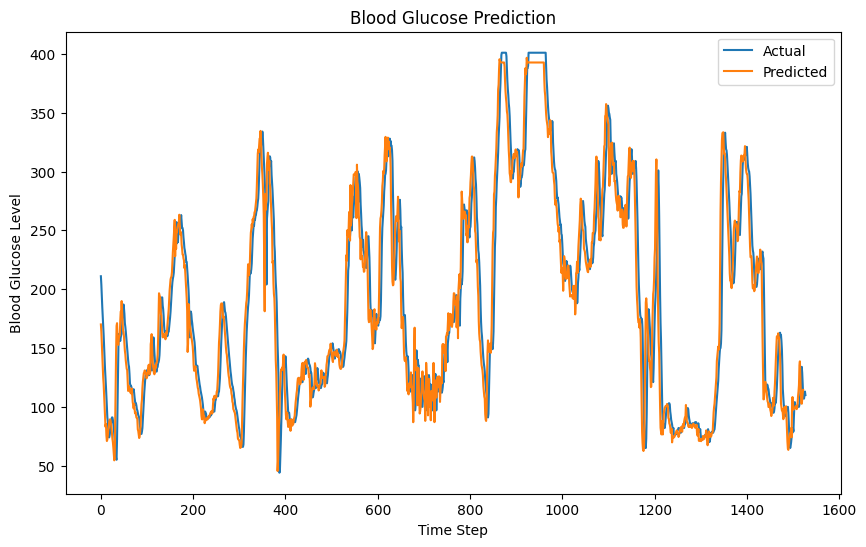

In [ ]:
import matplotlib.pyplot as plt

# Actual values
actual_values = test_patient_data['Value'].values

# Predicted values
predicted_values = predictions

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(actual_values, label='Actual')
plt.plot(predicted_values, label='Predicted')
plt.title('Blood Glucose Prediction')
plt.xlabel('Time Step')
plt.ylabel('Blood Glucose Level')
plt.legend()
plt.show()


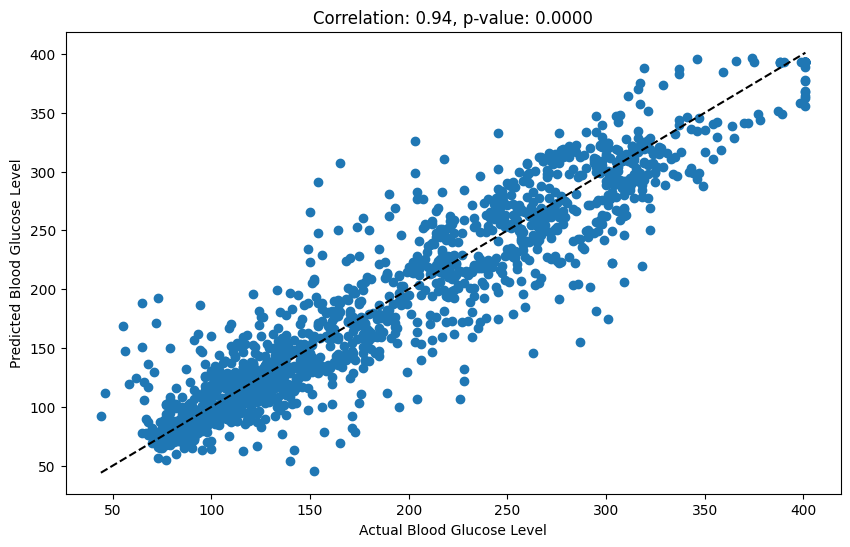

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np

# Actual values
actual_values = test_patient_data['Value'].values

# Predicted values
predicted_values = predictions

# Remove any extra dimensions from predicted_values
predicted_values = np.squeeze(predicted_values)

# Ensure that actual_values and predicted_values have the same length
if len(actual_values) != len(predicted_values):
    min_length = min(len(actual_values), len(predicted_values))
    actual_values = actual_values[:min_length]
    predicted_values = predicted_values[:min_length]

# Remove non-numeric or missing values
is_valid = ~np.isnan(actual_values) & ~np.isnan(predicted_values)
actual_values = actual_values[is_valid]
predicted_values = predicted_values[is_valid]

# Calculate the correlation coefficient
correlation, p_value = scipy.stats.pearsonr(actual_values, predicted_values)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(actual_values, predicted_values)

# Add a diagonal line (where r = 1)
plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], 'k--')

plt.title('Correlation: {:.2f}, p-value: {:.4f}'.format(correlation, p_value))
plt.xlabel('Actual Blood Glucose Level')
plt.ylabel('Predicted Blood Glucose Level')
plt.show()


In [ ]:


import matplotlib.pyplot as plt


#This function takes in the reference values and the prediction values as lists and returns a list with each index corresponding to the total number
#of points within that zone (0=A, 1=B, 2=C, 3=D, 4=E) and the plot
def clarke_error_grid(ref_values, pred_values, title_string):

    #Checking to see if the lengths of the reference and prediction arrays are the same
    assert (len(ref_values) == len(pred_values)), "Unequal number of values (reference : {}) (prediction : {}).".format(len(ref_values), len(pred_values))

    #Checks to see if the values are within the normal physiological range, otherwise it gives a warning
    if max(ref_values) > 400 or max(pred_values) > 400:
        print ("Input Warning: the maximum reference value {} or the maximum prediction value {} exceeds the normal physiological range of glucose (<400 mg/dl).").format(max(ref_values), max(pred_values))
    if min(ref_values) < 0 or min(pred_values) < 0:
        print ("Input Warning: the minimum reference value {} or the minimum prediction value {} is less than 0 mg/dl.").format(min(ref_values),  min(pred_values))

    #Clear plot
    plt.clf()

    #Set up plot
    plt.scatter(ref_values, pred_values, marker='o', color='black', s=8)
    plt.title(title_string + " Clarke Error Grid")
    plt.xlabel("Reference Concentration (mg/dl)")
    plt.ylabel("Prediction Concentration (mg/dl)")
    plt.xticks([0, 50, 100, 150, 200, 250, 300, 350, 400])
    plt.yticks([0, 50, 100, 150, 200, 250, 300, 350, 400])
    plt.gca().set_facecolor('white')

    #Set axes lengths
    plt.gca().set_xlim([0, 400])
    plt.gca().set_ylim([0, 400])
    plt.gca().set_aspect((400)/(400))

    #Plot zone lines
    plt.plot([0,400], [0,400], ':', c='black')                      #Theoretical 45 regression line
    plt.plot([0, 175/3], [70, 70], '-', c='black')
    #plt.plot([175/3, 320], [70, 400], '-', c='black')
    plt.plot([175/3, 400/1.2], [70, 400], '-', c='black')           #Replace 320 with 400/1.2 because 100*(400 - 400/1.2)/(400/1.2) =  20% error
    plt.plot([70, 70], [84, 400],'-', c='black')
    plt.plot([0, 70], [180, 180], '-', c='black')
    plt.plot([70, 290],[180, 400],'-', c='black')
    # plt.plot([70, 70], [0, 175/3], '-', c='black')
    plt.plot([70, 70], [0, 56], '-', c='black')                     #Replace 175.3 with 56 because 100*abs(56-70)/70) = 20% error
    # plt.plot([70, 400],[175/3, 320],'-', c='black')
    plt.plot([70, 400], [56, 320],'-', c='black')
    plt.plot([180, 180], [0, 70], '-', c='black')
    plt.plot([180, 400], [70, 70], '-', c='black')
    plt.plot([240, 240], [70, 180],'-', c='black')
    plt.plot([240, 400], [180, 180], '-', c='black')
    plt.plot([130, 180], [0, 70], '-', c='black')

    #Add zone titles
    plt.text(30, 15, "A", fontsize=15)
    plt.text(370, 260, "B", fontsize=15)
    plt.text(280, 370, "B", fontsize=15)
    plt.text(160, 370, "C", fontsize=15)
    plt.text(160, 15, "C", fontsize=15)
    plt.text(30, 140, "D", fontsize=15)
    plt.text(370, 120, "D", fontsize=15)
    plt.text(30, 370, "E", fontsize=15)
    plt.text(370, 15, "E", fontsize=15)

    #Statistics from the data
    zone = [0] * 5
    for i in range(len(ref_values)):
        if (ref_values[i] <= 70 and pred_values[i] <= 70) or (pred_values[i] <= 1.2*ref_values[i] and pred_values[i] >= 0.8*ref_values[i]):
            zone[0] += 1    #Zone A

        elif (ref_values[i] >= 180 and pred_values[i] <= 70) or (ref_values[i] <= 70 and pred_values[i] >= 180):
            zone[4] += 1    #Zone E

        elif ((ref_values[i] >= 70 and ref_values[i] <= 290) and pred_values[i] >= ref_values[i] + 110) or ((ref_values[i] >= 130 and ref_values[i] <= 180) and (pred_values[i] <= (7/5)*ref_values[i] - 182)):
            zone[2] += 1    #Zone C
        elif (ref_values[i] >= 240 and (pred_values[i] >= 70 and pred_values[i] <= 180)) or (ref_values[i] <= 175/3 and pred_values[i] <= 180 and pred_values[i] >= 70) or ((ref_values[i] >= 175/3 and ref_values[i] <= 70) and pred_values[i] >= (6/5)*ref_values[i]):
            zone[3] += 1    #Zone D
        else:
            zone[1] += 1    #Zone B

    return plt, zone

In [ ]:
clarke_error_grid(VALUE, x_pred, CEGplot)

NameError: ignored

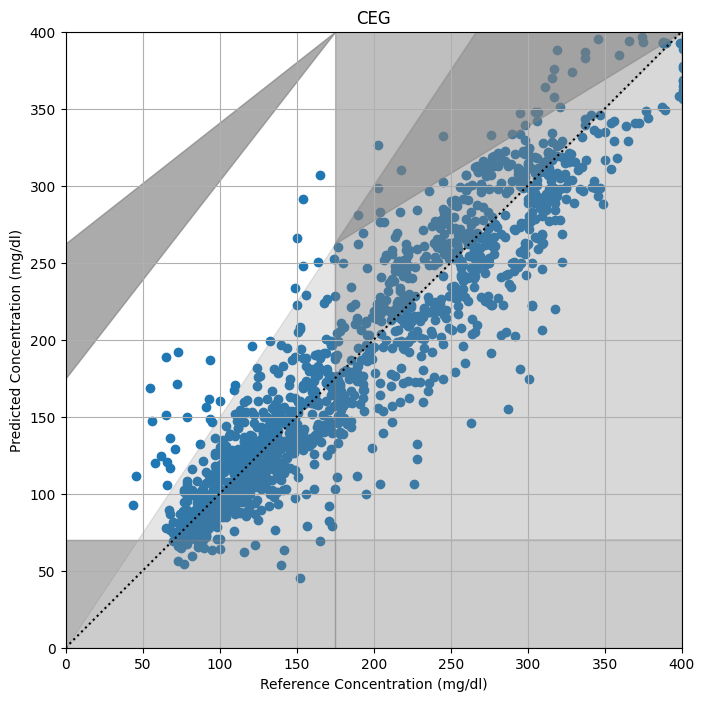

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def clarke_error_grid(actual_values, predicted_values, title):
    """
    This function will create a Clarke Error Grid
    """

# Ensure that actual_values and predicted_values have the same length
if len(actual_values) != len(predicted_values):
    min_length = min(len(actual_values), len(predicted_values))
    actual_values = actual_values[:min_length]
    predicted_values = predicted_values[:min_length]



    plt.figure(figsize=(8,8))
    # Set up the figure and axis
    plt.scatter(actual_values, predicted_values, marker='o')
    plt.title('CEG')
    plt.xlabel('Reference Concentration (mg/dl)')
    plt.ylabel('Predicted Concentration (mg/dl)')
    plt.grid(True)

    # Set the axes aspect to equal
    plt.gca().set_aspect('equal', adjustable='box')

    # Draw the grid lines for the different zones
    plt.plot([0,400], [0,400], ':', c='k')  # The ideal line (Zone A)
    plt.fill_between([0,175], [0,175], [70,70], color='gray', alpha=0.1)  # Zone A
    plt.fill_between([0,175], [70,70], [0,175*3/2], color='gray', alpha=0.2)  # Zone B
    plt.fill_between([175,400], [175,400], [175*3/2,600], color='gray', alpha=0.2)  # Zone B
    plt.fill_between([175,400], [175*3/2,600], [70,70], color='gray', alpha=0.3)  # Zone C
    plt.fill_between([0,175], [175*3/2,400], [175,400], color='gray', alpha=0.3)  # Zone C
    plt.fill_between([175,400], [70,70], [0,0], color='gray', alpha=0.4)  # Zone D
    plt.fill_between([0,175], [0,0], [70,70], color='gray', alpha=0.4)  # Zone D
    plt.fill_between([0,175], [175,400], [175*3/2,400], color='gray', alpha=0.5)  # Zone E
    plt.fill_between([175,400], [400,400], [175*3/2,400], color='gray', alpha=0.5)  # Zone E

    plt.xlim([0, 400])
    plt.ylim([0, 400])
    plt.show()

# Actual values
actual_values = test_patient_data['Value'].values

# Predicted values
predicted_values = np.squeeze(predictions)

# Plot the Clarke Error Grid
clarke_error_grid(actual_values, predicted_values, 'Clarke Error Grid')


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Number of steps
n_steps_in = 5

# Decide patient IDs for training and validation
train_patient_id = 445
validation_patient_id = 446  # choose appropriate patient ID for validation

# Filter the data for the training patient
train_patient_data = data[data['PtID'] == train_patient_id][['Normalized BGrisk', 'Value']]

# Normalize features to a range of 0-1
scaler = MinMaxScaler()
train_patient_data_normalized = scaler.fit_transform(train_patient_data)

# Create sequences
X_train, y_train = create_sequences(train_patient_data_normalized, n_steps_in)

# Filter the data for the validation patient
validation_patient_data = data[data['PtID'] == validation_patient_id][['Normalized BGrisk', 'Value']]

# Normalize features to a range of 0-1 using the scaler fitted on the training data
validation_patient_data_normalized = scaler.transform(validation_patient_data)

# Create sequences
X_validation, y_validation = create_sequences(validation_patient_data_normalized, n_steps_in)
